In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    data = pd.read_csv('retail_sales_dataset.csv')
    df = pd.DataFrame(data)
    print(df.head())
except:
    FileNotFoundError

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


###**Checking and Handling of Null values**

In [ ]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


###**Basic Descriptive Statistics**

In [ ]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


###**Groupings**

In [ ]:
bins = list(range(18, 70, 10))  # 18-27, 28-37, ..., 88-97
labels = [f'{i}-{i+9}' for i in bins[:-1]]

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

grouped = df.groupby('AgeGroup')
print(grouped.size())


AgeGroup
18-27    214
28-37    191
38-47    222
48-57    227
58-67    146
dtype: int64


<ipython-input-19-b7a513e793cc>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('AgeGroup')


In [ ]:
grouped = df.groupby('Gender').agg({'Age': 'mean', 'Customer ID': 'count'})
print(grouped)

              Age  Customer ID
Gender                        
Female  41.356863          510
Male    41.428571          490


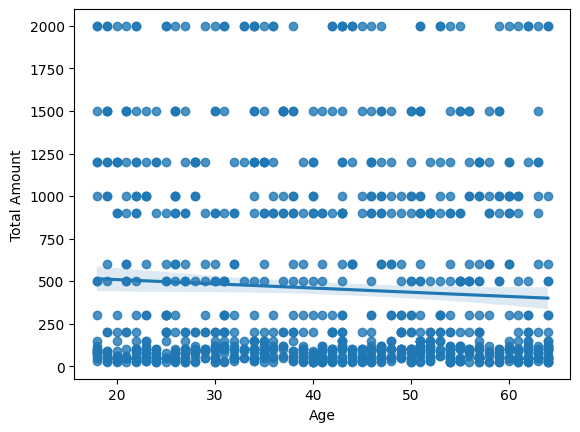

In [ ]:
sns.regplot(x="Age", y="Total Amount", data=df)
plt.show()


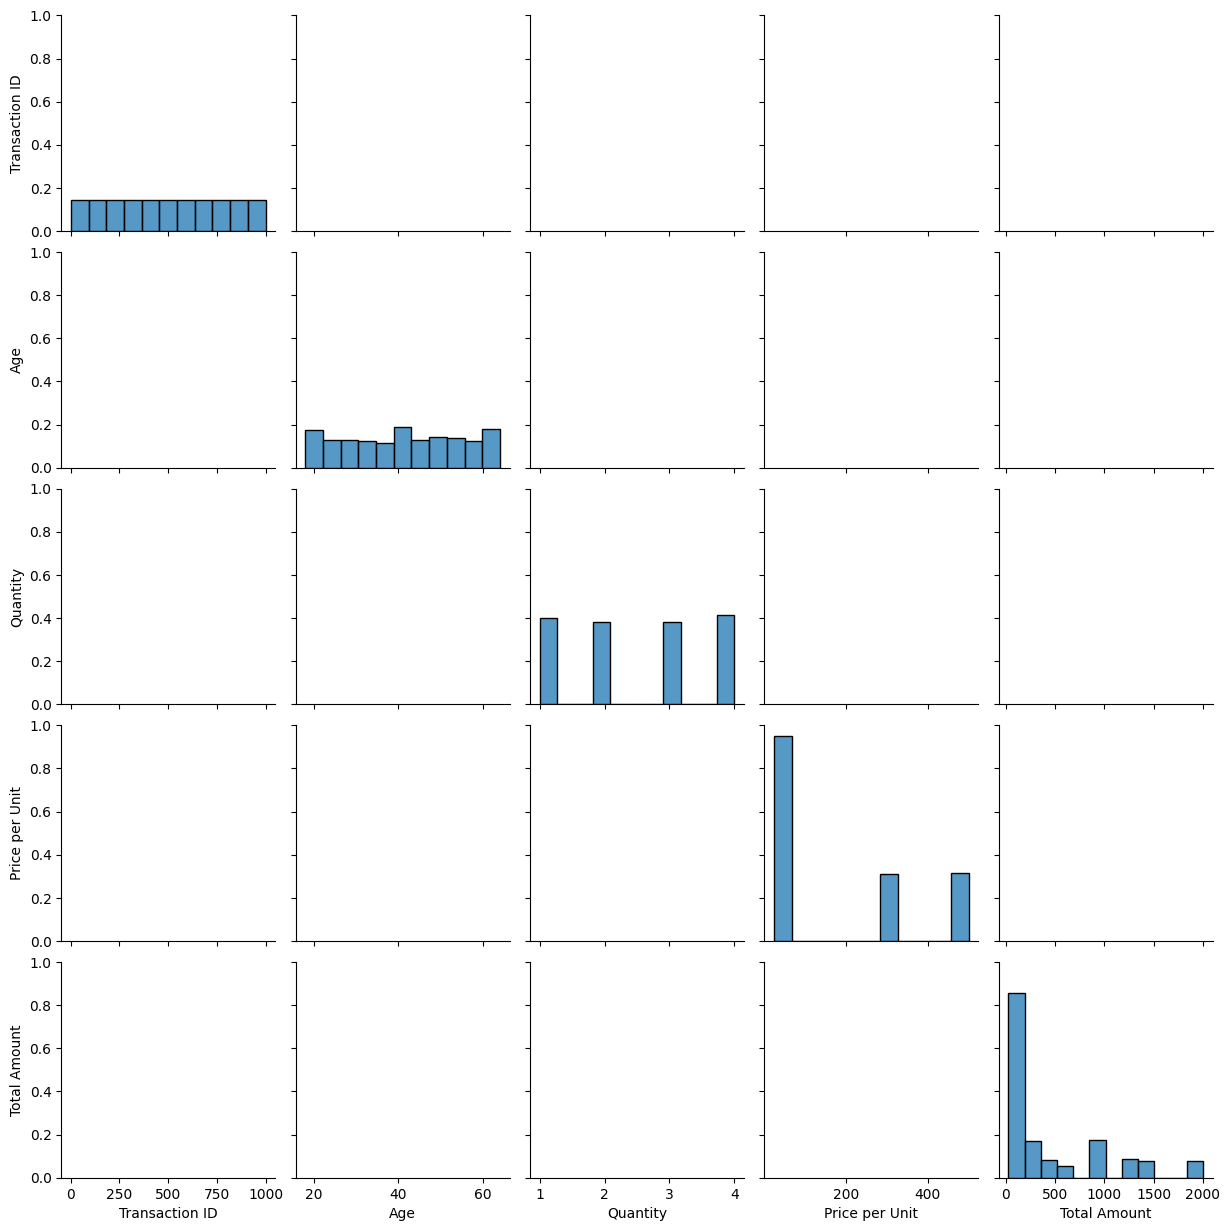

In [ ]:
sns.pairplot(df, kind='Scatter')

plt.show()

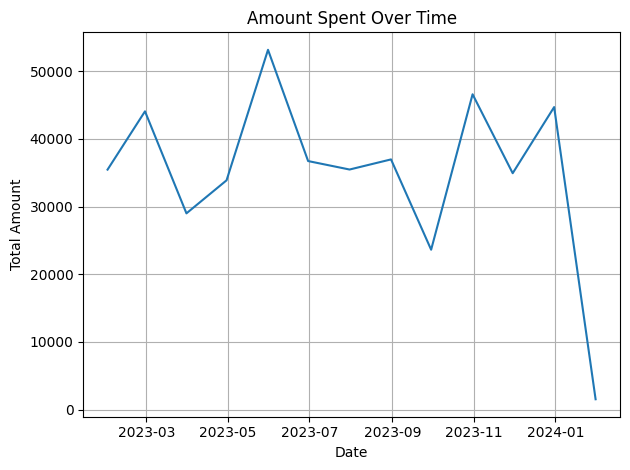

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df = df.set_index('Date')

monthly_sum = df.resample('ME')['Total Amount'].sum()

plt.plot(monthly_sum.index, monthly_sum.values)
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.title('Amount Spent Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

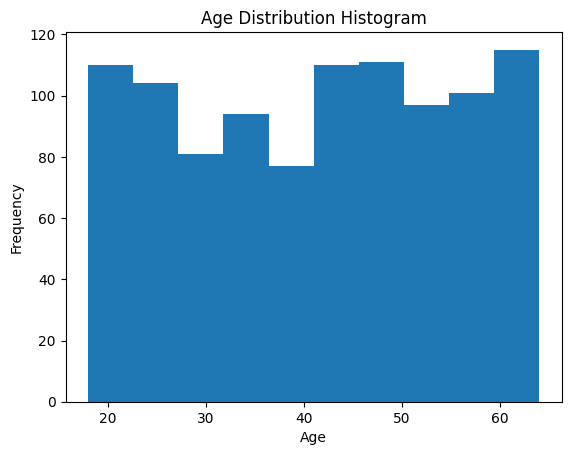

In [ ]:
df['Age'].plot(kind='hist', bins=10)
plt.xlabel('Age')
plt.title('Age Distribution Histogram')
plt.show()

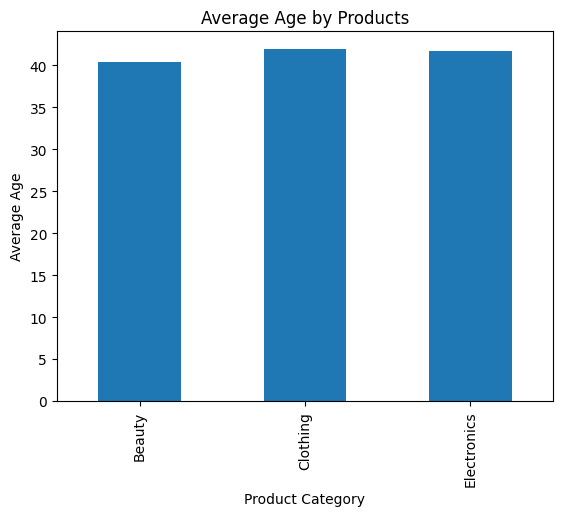

In [ ]:
df.groupby('Product Category')['Age'].mean().plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Average Age')
plt.title('Average Age by Products')
plt.show()

Pearson Correlation: -0.0606
P-value: 0.0555


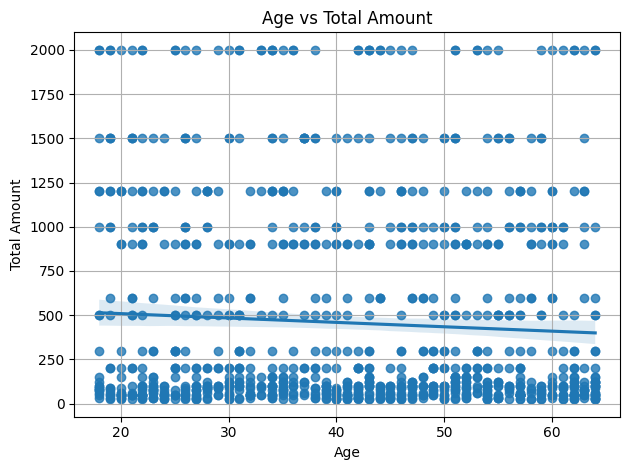

                            OLS Regression Results                            
Dep. Variable:           Total Amount   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.675
Date:                Thu, 17 Apr 2025   Prob (F-statistic):             0.0555
Time:                        22:37:58   Log-Likelihood:                -7744.5
No. Observations:                1000   AIC:                         1.549e+04
Df Residuals:                     998   BIC:                         1.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        558.6159     56.377      9.909      0.0

In [3]:
from scipy.stats import pearsonr
import statsmodels.api as sm

# Correlation analysis
correlation, p_value = pearsonr(df['Age'], df['Total Amount'])
print(f"Pearson Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Plot of the correlation
sns.regplot(x='Age', y='Total Amount', data=df)
plt.title('Age vs Total Amount')
plt.xlabel('Age')
plt.ylabel('Total Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# Linear Regression
X = sm.add_constant(df['Age'])  # Add intercept
model = sm.OLS(df['Total Amount'], X).fit()
print(model.summary())